<h1>Classificador bayesiano com função densidade de probabilidade (verossimilhança) obtida com base em Janela de Parzen.</h1>

<h2>Dataset Iris</h2>

<h3>Uma execução</h3>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia média: 0.96 ± 0.02
Matriz de Confusão (uma das execuções):
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


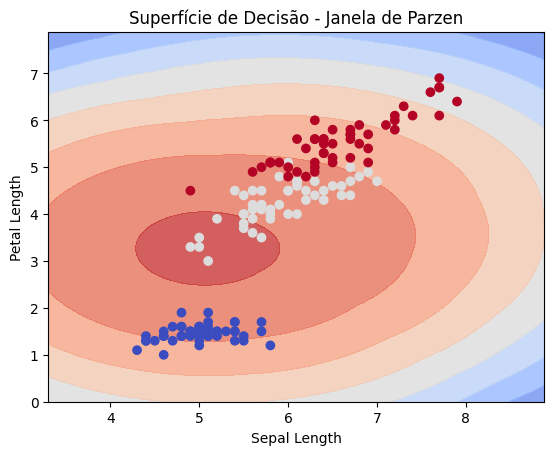

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Importar dataset Iris
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# Converter para NumPy array caso X seja DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Codificar labels para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Parâmetros para Janela de Parzen
bandwidth = 0.1  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")
print("Matriz de Confusão (uma das execuções):\n", confusion_matrices[0])

# Plotar superfície de decisão para o par de atributos (0: sepal length, 2: petal length)
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), np.zeros_like(xx.ravel()), yy.ravel(), np.zeros_like(xx.ravel())]

    for label, kde in enumerate(kde_models):
        Z += kde.score_samples(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão
plot_decision_boundary(X, y, kde_models, bandwidth)


<h3>Matriz confusão da ultima realização, 20 execuções e normalização de dados</h3>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia média: 0.96 ± 0.02
Matriz de Confusão (uma das execuções):
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Conjunto de Treinamento:
 [[6.4 2.7 5.3 1.9]
 [5.  3.5 1.6 0.6]
 [6.3 3.4 5.6 2.4]
 [5.4 3.4 1.7 0.2]
 [4.6 3.2 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.9 3.  4.2 1.5]
 [6.  2.9 4.5 1.5]
 [4.4 3.  1.3 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 3.2 5.3 2.3]
 [4.6 3.1 1.5 0.2]
 [6.  3.  4.8 1.8]
 [5.5 3.5 1.3 0.2]
 [5.5 4.2 1.4 0.2]
 [7.1 3.  5.9 2.1]
 [6.3 2.7 4.9 1.8]
 [7.9 3.8 6.4 2. ]
 [5.4 3.9 1.7 0.4]
 [5.1 3.8 1.6 0.2]
 [6.3 2.9 5.6 1.8]
 [5.2 3.4 1.4 0.2]
 [7.4 2.8 6.1 1.9]
 [6.7 3.  5.  1.7]
 [6.3 2.5 5.  1.9]
 [4.7 3.2 1.6 0.2]
 [5.9 3.2 4.8 1.8]
 [7.3 2.9 6.3 1.8]
 [6.7 3.  5.2 2.3]
 [6.3 3.3 6.  2.5]
 [4.9 3.1 1.5 0.1]
 [5.  3.4 1.6 0.4]
 [5.7 2.8 4.1 1.3]
 [6.7 3.1 4.4 1.4]
 [6.9 3.1 5.1 2.3]
 [5.3 3.7 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [6.5 3.  5.2 2. ]
 [6.6 2.9 4.6 1.3]
 [5.8 2.7 4.1 1. ]
 [5.1 3.7 1.5 0.4]
 [5.1 3.8 1.9 0.4]
 [6.3 2.3 4.4 1.3]
 [6.9 3.1 5.4 2.1]
 [6.1 3.  4.9 1.8]
 [7.7 3.8 6.7

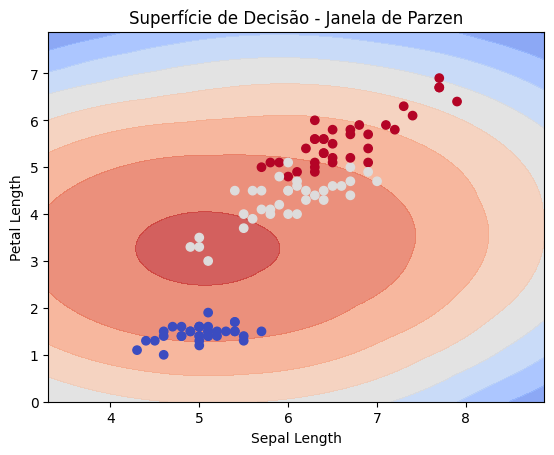

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Importar dataset Iris
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# Converter para NumPy array caso X seja DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Codificar labels para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Parâmetros para Janela de Parzen
bandwidth = 0.1  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")
print("Matriz de Confusão (uma das execuções):\n", confusion_matrices[0])

# Exibir conjuntos de dados de treinamento e teste de uma execução
print("Conjunto de Treinamento:\n", X_train)
print("Conjunto de Teste:\n", X_test)

# Função para plotar a superfície de decisão para o par de atributos (0: sepal length, 2: petal length)
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), np.zeros_like(xx.ravel()), yy.ravel(), np.zeros_like(xx.ravel())]

    for label, kde in enumerate(kde_models):
        Z += kde.score_samples(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão usando os dados de uma execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


<h3>Matriz confusão computada das 20 execuções e normalização de dados</h3>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia média: 0.96 ± 0.02


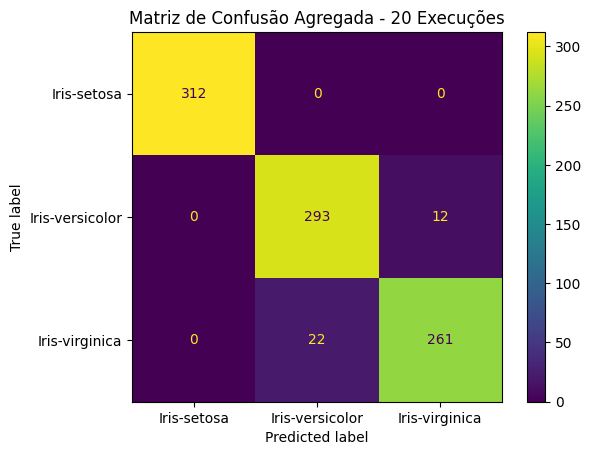

Conjunto de Treinamento:
 [[6.4 2.7 5.3 1.9]
 [5.  3.5 1.6 0.6]
 [6.3 3.4 5.6 2.4]
 [5.4 3.4 1.7 0.2]
 [4.6 3.2 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.9 3.  4.2 1.5]
 [6.  2.9 4.5 1.5]
 [4.4 3.  1.3 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 3.2 5.3 2.3]
 [4.6 3.1 1.5 0.2]
 [6.  3.  4.8 1.8]
 [5.5 3.5 1.3 0.2]
 [5.5 4.2 1.4 0.2]
 [7.1 3.  5.9 2.1]
 [6.3 2.7 4.9 1.8]
 [7.9 3.8 6.4 2. ]
 [5.4 3.9 1.7 0.4]
 [5.1 3.8 1.6 0.2]
 [6.3 2.9 5.6 1.8]
 [5.2 3.4 1.4 0.2]
 [7.4 2.8 6.1 1.9]
 [6.7 3.  5.  1.7]
 [6.3 2.5 5.  1.9]
 [4.7 3.2 1.6 0.2]
 [5.9 3.2 4.8 1.8]
 [7.3 2.9 6.3 1.8]
 [6.7 3.  5.2 2.3]
 [6.3 3.3 6.  2.5]
 [4.9 3.1 1.5 0.1]
 [5.  3.4 1.6 0.4]
 [5.7 2.8 4.1 1.3]
 [6.7 3.1 4.4 1.4]
 [6.9 3.1 5.1 2.3]
 [5.3 3.7 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [6.5 3.  5.2 2. ]
 [6.6 2.9 4.6 1.3]
 [5.8 2.7 4.1 1. ]
 [5.1 3.7 1.5 0.4]
 [5.1 3.8 1.9 0.4]
 [6.3 2.3 4.4 1.3]
 [6.9 3.1 5.4 2.1]
 [6.1 3.  4.9 1.8]
 [7.7 3.8 6.7 2.2]
 [5.4 3.4 1.5 0.4]
 [6.1 2.9 4.7 1.4]
 [6.7 3.3 5.7 2.1]
 [5.1 3.5 1.4 0.2]
 [6.9 3.2 5.7 2.3]
 [6. 

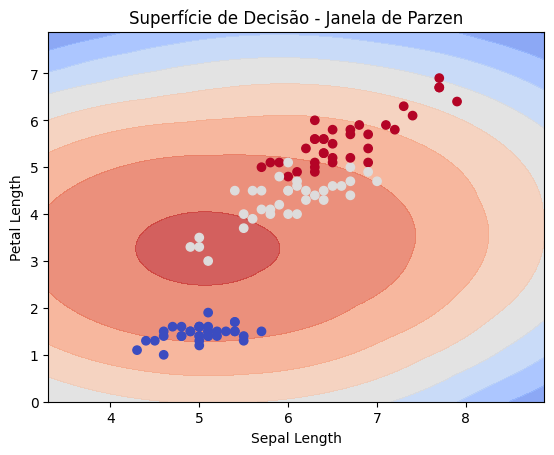

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Importar dataset Iris
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

# Converter para NumPy array caso X seja DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Codificar labels para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Parâmetros para Janela de Parzen
bandwidth = 0.1  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

# Agregar matrizes de confusão de todas as execuções
conf_matrix_sum = np.sum(confusion_matrices, axis=0)

# Plotar a matriz de confusão agregada
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sum, display_labels=le.classes_)
disp.plot()
plt.title('Matriz de Confusão Agregada - 20 Execuções')
plt.show()

# Exibir conjuntos de dados de treinamento e teste de uma execução
print("Conjunto de Treinamento:\n", X_train)
print("Conjunto de Teste:\n", X_test)

# Função para plotar a superfície de decisão para o par de atributos (0: sepal length, 2: petal length)
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), np.zeros_like(xx.ravel()), yy.ravel(), np.zeros_like(xx.ravel())]

    for label, kde in enumerate(kde_models):
        Z += kde.score_samples(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


<h2>Dataset Coluna Vertebral</h2>

Matriz de Confusão (Última Execução):
[[10  0  0]
 [ 0 10  2]
 [ 0  5  3]]
Acurácia Média: 0.7600
Desvio Padrão da Acurácia: 0.0892


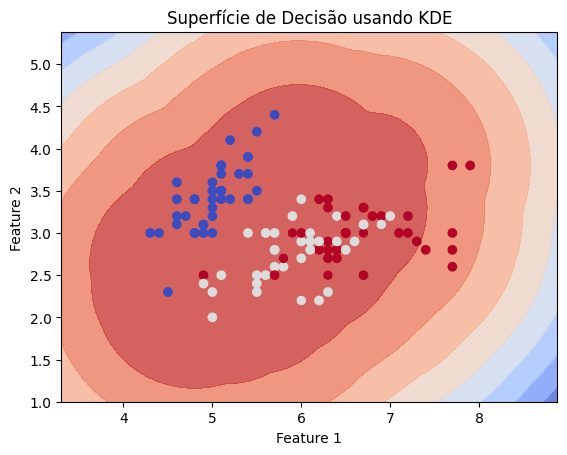

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score

# Carregar o conjunto de dados Iris
data = load_iris()
X = data.data
y = data.target

# Selecionar duas features (exemplo: as duas primeiras)
X = X[:, :2]

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parâmetro de banda para o KDE
bandwidth = 0.1

# Ajustar o modelo KDE para cada classe
kde_models = []
for label in np.unique(y_train):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(X_train[y_train == label])
    kde_models.append(kde)

# Função para plotar a superfície de decisão
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    
    # Calcular a soma das densidades estimadas para cada ponto na grade
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    for label, kde in enumerate(kde_models):
        Z += kde.score_samples(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Superfície de Decisão usando KDE')
    plt.show()

# Executar múltiplas execuções e calcular a acurácia e a matriz de confusão
accuracies = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Ajustar o modelo KDE para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Fazer previsões no conjunto de teste
    y_pred = []
    for x in X_test:
        scores = [kde.score_samples(x.reshape(1, -1)) for kde in kde_models]
        y_pred.append(np.argmax(scores))
    
    # Calcular a acurácia
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Imprimir a matriz de confusão para uma execução específica (por exemplo, a última)
    if i == 19:
        print("Matriz de Confusão (Última Execução):")
        print(confusion_matrix(y_test, y_pred))

# Calcular a acurácia média e o desvio padrão
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Desvio Padrão da Acurácia: {std_accuracy:.4f}")

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


Acurácia Média: 0.7600
Desvio Padrão da Acurácia: 0.0892


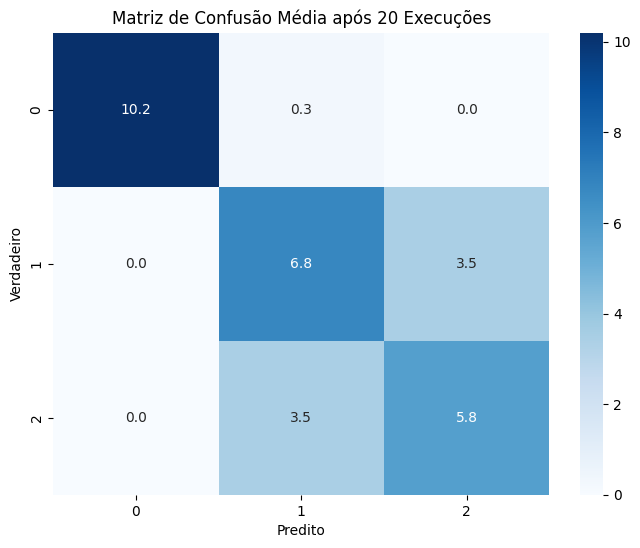


Conjunto de Dados de Treinamento (última execução):
   Feature 1  Feature 2  Label
0        4.8        3.4      0
1        6.0        2.2      2
2        6.3        2.5      1
3        4.9        2.5      2
4        5.5        2.5      1

Conjunto de Dados de Teste (última execução):
   Feature 1  Feature 2  Label
0        4.7        3.2      0
1        6.8        3.0      2
2        5.5        2.6      1
3        5.6        3.0      1
4        5.2        3.5      0


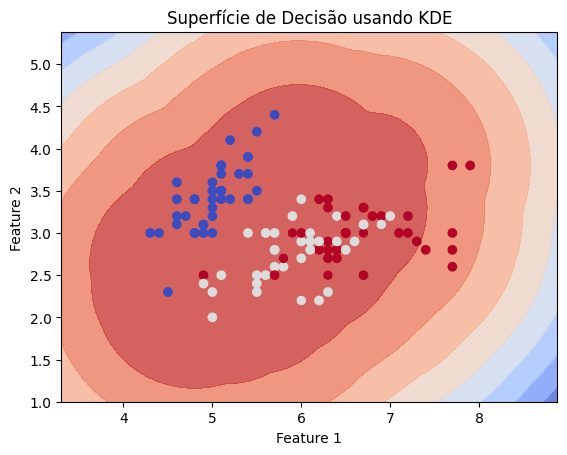

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd

# Carregar o conjunto de dados Iris
data = load_iris()
X = data.data
y = data.target

# Selecionar duas features (exemplo: as duas primeiras)
X = X[:, :2]

# Função para plotar a superfície de decisão
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    
    # Calcular a soma das densidades estimadas para cada ponto na grade
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    for label, kde in enumerate(kde_models):
        Z += kde.score_samples(grid_points).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Superfície de Decisão usando KDE')
    plt.show()

# Parâmetro de banda para o KDE
bandwidth = 0.1

# Listas para armazenar acurácias e matrizes de confusão
accuracies = []
conf_matrices = []

# Executar múltiplas execuções e calcular a acurácia e a matriz de confusão
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    # Ajustar o modelo KDE para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Fazer previsões no conjunto de teste
    y_pred = []
    for x in X_test:
        scores = [kde.score_samples(x.reshape(1, -1)) for kde in kde_models]
        y_pred.append(np.argmax(scores))
    
    # Calcular a acurácia
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    # Armazenar a matriz de confusão
    conf_matrices.append(confusion_matrix(y_test, y_pred))

# Calcular a acurácia média e o desvio padrão
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Desvio Padrão da Acurácia: {std_accuracy:.4f}")

# Plotar a matriz de confusão média
mean_conf_matrix = np.mean(conf_matrices, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".1f", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão Média após 20 Execuções")
plt.show()

# Exibir os dados utilizados na última execução
df_train = pd.DataFrame(X_train, columns=['Feature 1', 'Feature 2'])
df_train['Label'] = y_train
df_test = pd.DataFrame(X_test, columns=['Feature 1', 'Feature 2'])
df_test['Label'] = y_test

print("\nConjunto de Dados de Treinamento (última execução):")
print(df_train.head())

print("\nConjunto de Dados de Teste (última execução):")
print(df_test.head())

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia média: 0.59 ± 0.04


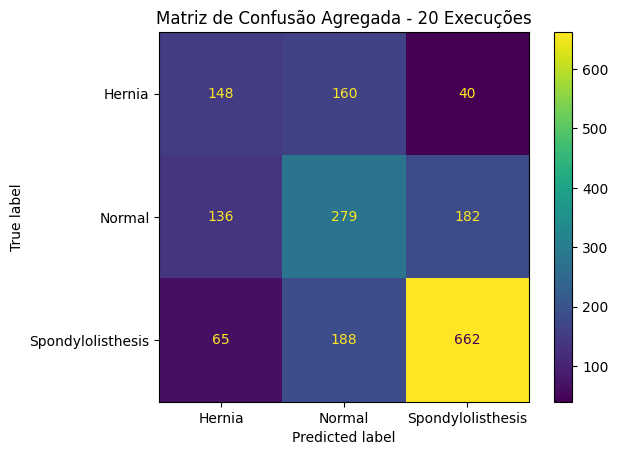

Conjunto de Treinamento:
 [[ 81.08232025  21.25584028]
 [ 59.16761171  14.56274875]
 [ 41.17167989  17.32120599]
 [ 81.05661087  20.80149217]
 [ 43.1919153    9.9766638 ]
 [ 35.49244617  11.7016723 ]
 [ 67.02766447  13.28150221]
 [ 50.08615264  13.43004422]
 [ 60.7538935   15.7538935 ]
 [ 90.51396072  28.27250132]
 [ 39.65690201  16.20883944]
 [ 74.09473084  18.82372712]
 [ 85.64378664  42.68919513]
 [ 37.90391014   4.47909896]
 [ 85.09550254  21.06989651]
 [ 48.25991962  16.41746236]
 [ 77.23689752  16.73762214]
 [ 38.66325708  12.98644139]
 [ 78.49173027  22.1817978 ]
 [ 49.70660953  13.04097405]
 [ 44.43070103  14.17426387]
 [ 50.16007802  -2.97002434]
 [ 37.7319919    9.38629828]
 [ 74.56501543  15.72431994]
 [ 85.58171024  30.45703858]
 [ 58.82837872  37.57787321]
 [ 31.23238734  17.71581923]
 [ 50.91244034  23.01516931]
 [ 43.43645061  10.09574326]
 [ 46.44207842   8.39503589]
 [ 26.14792141  10.75945357]
 [ 78.40125389  14.04225971]
 [ 54.74177518  12.09507205]
 [ 46.39026008  1

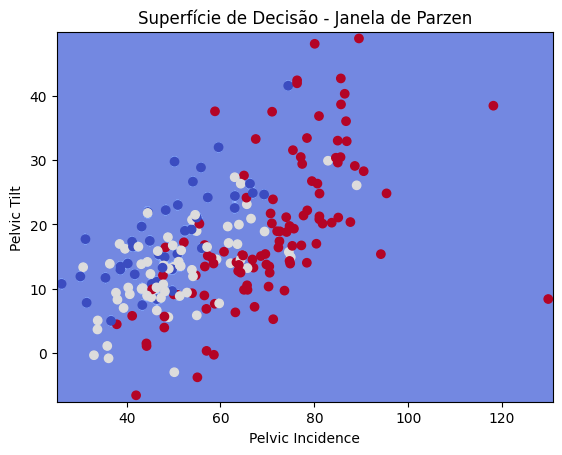

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Importar dataset Coluna Vertebral
vertebral_column = fetch_ucirepo(id=212)
X = vertebral_column.data.features
y = vertebral_column.data.targets

# Converter para NumPy array caso X seja DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Codificar labels para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Selecionar atributos específicos para visualização
# Escolher 'pelvic_incidence' (índice 0) e 'pelvic_tilt' (índice 1)
X = X[:, [0, 1]]

# Parâmetros para Janela de Parzen
bandwidth = 0.5  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

# Agregar matrizes de confusão de todas as execuções
conf_matrix_sum = np.sum(confusion_matrices, axis=0)

# Plotar a matriz de confusão agregada
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sum, display_labels=le.classes_)
disp.plot()
plt.title('Matriz de Confusão Agregada - 20 Execuções')
plt.show()

# Exibir conjuntos de dados de treinamento e teste de uma execução
print("Conjunto de Treinamento:\n", X_train)
print("Conjunto de Teste:\n", X_test)

# Função para plotar a superfície de decisão para o par de atributos
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    for label, kde in enumerate(kde_models):
        Z += np.exp(kde.score_samples(grid_points)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Pelvic Incidence")
    plt.ylabel("Pelvic Tilt")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


<h2>Dataset Cancer de Pele</h2>

Acurácia média: 0.58 ± 0.06


C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


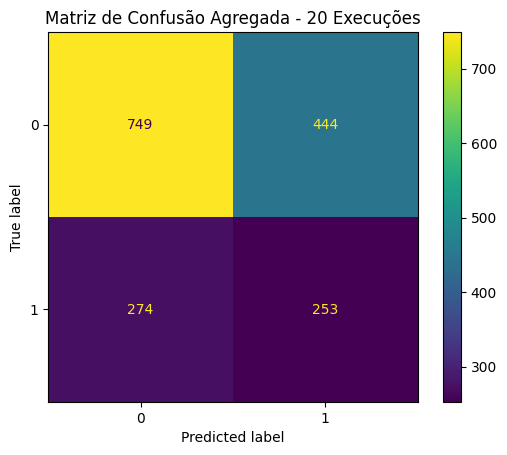

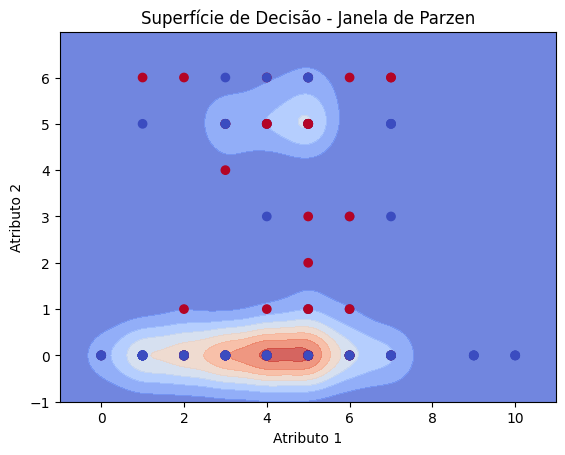

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Importar dataset Câncer de Mama
breast_cancer = fetch_ucirepo(id=14)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# Verificar se o conjunto de dados possui variáveis categóricas e codificá-las
X = pd.DataFrame(X)  # Converter para DataFrame para facilitar a manipulação
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Converter para NumPy array
X = X.values

# Codificar labels (alvo) para valores numéricos
y = LabelEncoder().fit_transform(y)

# Escolher um par de atributos (substitua pelos índices corretos para tumor-size e inv-nodes)
attribute_indices = [2, 3]  # Exemplo: 'tumor-size' e 'inv-nodes'
X = X[:, attribute_indices]

# Parâmetros para Janela de Parzen
bandwidth = 0.5  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

# Agregar matrizes de confusão de todas as execuções
conf_matrix_sum = np.sum(confusion_matrices, axis=0)

# Plotar a matriz de confusão agregada
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sum)
disp.plot()
plt.title('Matriz de Confusão Agregada - 20 Execuções')
plt.show()

# Função para plotar a superfície de decisão para o par de atributos
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    for label, kde in enumerate(kde_models):
        Z += np.exp(kde.score_samples(grid_points)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Atributo 1")
    plt.ylabel("Atributo 2")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


<h2>Dataaset Dermatológico</h2>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia média: 0.30 ± 0.04


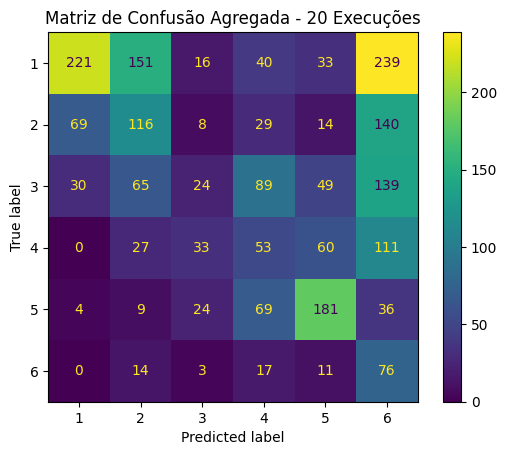

Conjunto de Treinamento:
 [[2. 1.]
 [3. 3.]
 [2. 2.]
 [2. 2.]
 [3. 2.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [1. 1.]
 [2. 3.]
 [2. 2.]
 [1. 2.]
 [3. 2.]
 [2. 1.]
 [2. 3.]
 [2. 2.]
 [3. 2.]
 [1. 1.]
 [3. 2.]
 [2. 1.]
 [2. 1.]
 [3. 2.]
 [1. 2.]
 [3. 2.]
 [2. 2.]
 [2. 1.]
 [1. 1.]
 [2. 2.]
 [3. 2.]
 [3. 1.]
 [2. 2.]
 [3. 2.]
 [2. 2.]
 [3. 2.]
 [3. 3.]
 [2. 1.]
 [2. 2.]
 [2. 1.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [2. 0.]
 [2. 1.]
 [2. 2.]
 [2. 1.]
 [2. 2.]
 [3. 2.]
 [3. 2.]
 [2. 2.]
 [1. 1.]
 [3. 2.]
 [1. 2.]
 [2. 2.]
 [2. 3.]
 [3. 1.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [1. 1.]
 [1. 1.]
 [3. 2.]
 [2. 2.]
 [1. 2.]
 [2. 1.]
 [2. 2.]
 [2. 3.]
 [2. 1.]
 [2. 1.]
 [2. 3.]
 [2. 1.]
 [3. 2.]
 [2. 2.]
 [2. 2.]
 [2. 1.]
 [3. 2.]
 [3. 2.]
 [2. 1.]
 [2. 2.]
 [1. 0.]
 [2. 3.]
 [3. 2.]
 [2. 2.]
 [3. 3.]
 [1. 1.]
 [2. 3.]
 [2. 2.]
 [3. 1.]
 [3. 1.]
 [2. 2.]
 [3. 2.]
 [2. 1.]
 [2. 2.]
 [3. 3.]
 [2. 2.]
 [3. 2.]
 [2. 2.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [3. 2.]
 [2. 1.]
 [1. 1.]
 [2. 2.]
 [3. 2.]
 [2. 1.]
 [

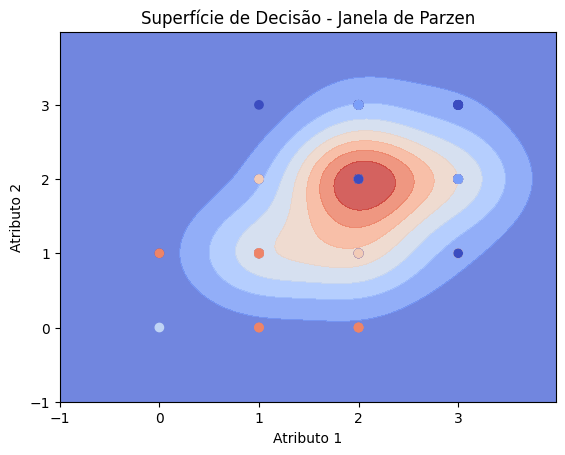

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Importar dataset Dermatology
dermatology = fetch_ucirepo(id=33)
X = dermatology.data.features
y = dermatology.data.targets

# Converter para NumPy array caso X seja DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Codificar labels para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Escolher os atributos para visualização (ex: 'erythema' e 'scaling')
attribute_indices = [0, 1]  # Substitua pelos índices corretos dos atributos que deseja visualizar
X = X[:, attribute_indices]

# Parâmetros para Janela de Parzen
bandwidth = 0.5  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

# Agregar matrizes de confusão de todas as execuções
conf_matrix_sum = np.sum(confusion_matrices, axis=0)

# Plotar a matriz de confusão agregada
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sum, display_labels=le.classes_)
disp.plot()
plt.title('Matriz de Confusão Agregada - 20 Execuções')
plt.show()

# Exibir conjuntos de dados de treinamento e teste de uma execução
print("Conjunto de Treinamento:\n", X_train)
print("Conjunto de Teste:\n", X_test)

# Função para plotar a superfície de decisão para o par de atributos
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    for label, kde in enumerate(kde_models):
        Z += np.exp(kde.score_samples(grid_points)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Atributo 1")
    plt.ylabel("Atributo 2")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


<h2>Gerando dataset artificial</h2>

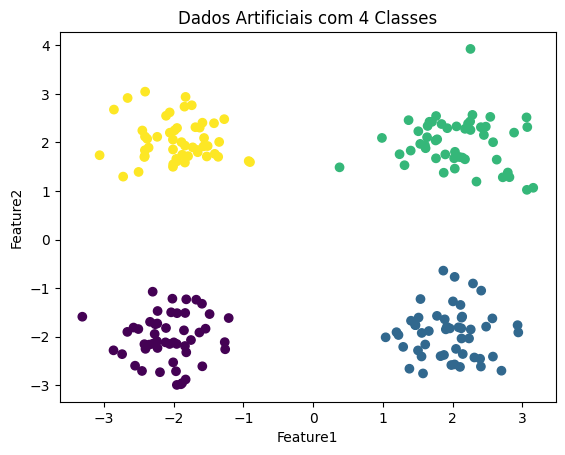

[[-1.75164292 -2.06913215]
 [-1.67615573 -1.23848507]
 [-2.11707669 -2.11706848]
 [-1.21039359 -1.61628264]
 [-2.23473719 -1.72871998]
 [-2.23170885 -2.23286488]
 [-1.87901886 -2.95664012]
 [-2.86245892 -2.28114376]
 [-2.50641556 -1.84287633]
 [-2.45401204 -2.70615185]
 [-1.26717562 -2.11288815]
 [-1.9662359  -2.71237409]
 [-2.27219136 -1.94453871]
 [-2.57549679 -1.81215099]
 [-2.30031934 -2.14584687]
 [-2.30085331 -1.07386091]
 [-2.00674861 -2.52885546]
 [-1.58872754 -2.61042182]
 [-1.8955682  -2.97983506]
 [-2.66409302 -1.90156938]
 [-1.63076671 -1.91431586]
 [-2.05782414 -2.15055185]
 [-2.739261   -2.3599221 ]
 [-2.23031939 -1.47143889]
 [-1.82819086 -2.88152008]
 [-1.83795802 -2.19254114]
 [-2.338461   -1.69416186]
 [-1.48450024 -1.53435994]
 [-2.41960876 -2.15460619]
 [-1.83436828 -1.51222744]
 [-2.23958712 -2.09282949]
 [-2.55316749 -2.59810331]
 [-1.59373709 -1.32187999]
 [-2.03600506 -1.49823355]
 [-1.81918199 -2.32255988]
 [-1.8193022  -1.23098172]
 [-2.01791302 -1.21767817]
 

In [9]:

np.random.seed(42)

# Definindo os parâmetros para as classes artificiais
# Classe 0: localizada abaixo e à esquerda
class_0 = np.random.normal(loc=(-2, -2), scale=0.5, size=(50, 2))

# Classe 1: localizada à direita e acima da linha, mas abaixo
class_1 = np.random.normal(loc=(2, -2), scale=0.5, size=(50, 2))

# Classe 2: localizada à direita e acima
class_2 = np.random.normal(loc=(2, 2), scale=0.5, size=(50, 2))

# Classe 3: localizada à esquerda e acima
class_3 = np.random.normal(loc=(-2, 2), scale=0.5, size=(50, 2))

# Combinando as classes
X_artificial = np.vstack((class_0, class_1, class_2, class_3))
y_artificial = np.array([0]*50 + [1]*50 + [2]*50 + [3]*50)

# Criando um DataFrame para os dados artificiais
artificial_data = pd.DataFrame(X_artificial, columns=['Feature1', 'Feature2'])
artificial_data['label'] = y_artificial

# Salvando os dados artificiais em um arquivo CSV
artificial_data.to_csv('dados_artificiais_classes.csv', index=False)

# Plot dos dados artificiais com as classes
plt.scatter(X_artificial[:, 0], X_artificial[:, 1], c=y_artificial, cmap='viridis')
plt.title("Dados Artificiais com 4 Classes")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()
# Empilhando as classes
data = np.vstack((class_0, class_1, class_2, class_3))

# Convertendo para array NumPy (se já não estiver)
data_array = np.array(data)
print(data)


<h3>Classificando dataset Artificial</h3>

Acurácia média: 1.00 ± 0.00


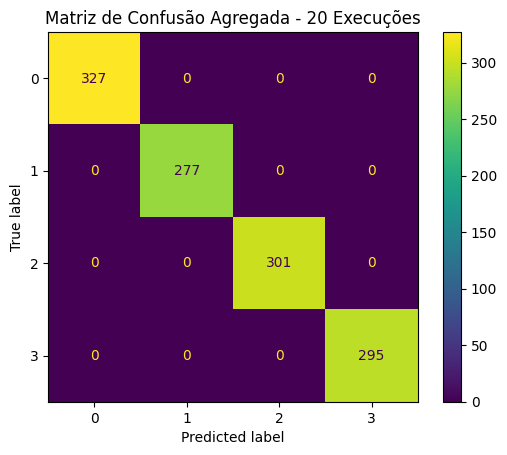

Conjunto de Treinamento:
 [[ 1.92410745  2.2941586 ]
 [ 2.25751763  2.25689298]
 [-2.01791302 -1.21767817]
 [ 1.63481668  2.10822929]
 [-1.48450024 -1.53435994]
 [ 2.48168806 -1.79360954]
 [ 2.12524643 -1.8267759 ]
 [ 1.77674252 -1.5718006 ]
 [-2.23031939 -1.47143889]
 [ 1.86767158 -0.63991542]
 [ 2.72063664  1.28206892]
 [-1.82819086 -2.88152008]
 [-1.75164292 -2.06913215]
 [ 2.3431301   1.19364206]
 [-2.05726992  2.61890816]
 [-1.41027994  1.76541217]
 [-1.8955682  -2.97983506]
 [-1.87751671  1.74652841]
 [-0.90509853  1.59585086]
 [ 2.25249364  2.4328776 ]
 [ 1.60837335 -2.16103076]
 [-1.6263532   2.30518513]
 [ 2.0301151  -0.76837894]
 [ 2.1287752  -2.03722296]
 [-2.72404217  1.29626811]
 [-1.83864072  1.58638453]
 [-1.54229894 -1.83562445]
 [-2.23170885 -2.23286488]
 [ 2.40643106  2.31481442]
 [-1.87901886 -2.95664012]
 [ 1.51265916 -1.6064577 ]
 [ 1.22466828 -1.96571851]
 [ 1.82864274 -2.40113863]
 [-1.95647647 -2.14950368]
 [ 1.40434825 -1.6717232 ]
 [-2.23551915  2.11602497]
 [

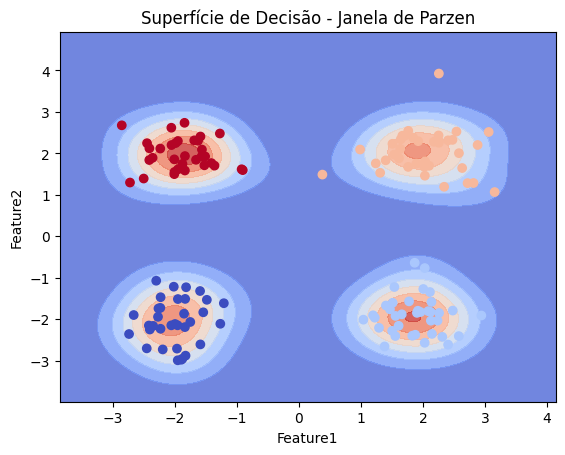

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Carregar os dados artificiais gerados
data = pd.read_csv('dados_artificiais_classes.csv')
X = data[['Feature1', 'Feature2']].values
y = data['label'].values

# Parâmetros para Janela de Parzen
bandwidth = 0.5  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

# Agregar matrizes de confusão de todas as execuções
conf_matrix_sum = np.sum(confusion_matrices, axis=0)

# Plotar a matriz de confusão agregada
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sum)
disp.plot()
plt.title('Matriz de Confusão Agregada - 20 Execuções')
plt.show()

# Exibir conjuntos de dados de treinamento e teste de uma execução
print("Conjunto de Treinamento:\n", X_train)
print("Conjunto de Teste:\n", X_test)

# Função para plotar a superfície de decisão para o par de atributos
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    for label, kde in enumerate(kde_models):
        Z += np.exp(kde.score_samples(grid_points)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


<h2>Dataset Coluna vertebral</h2>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia média: 0.59 ± 0.04


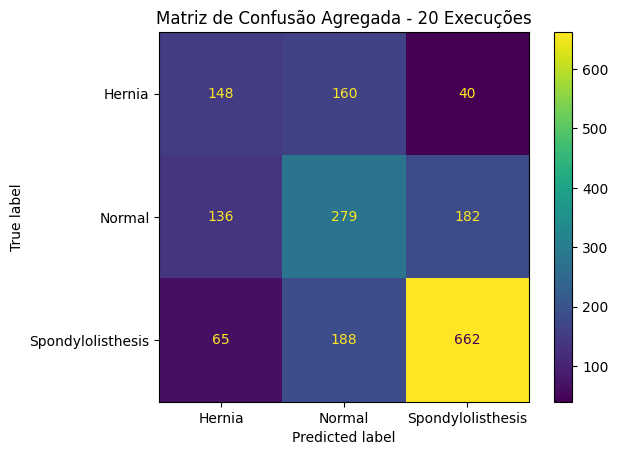

Conjunto de Treinamento:
 [[ 81.08232025  21.25584028]
 [ 59.16761171  14.56274875]
 [ 41.17167989  17.32120599]
 [ 81.05661087  20.80149217]
 [ 43.1919153    9.9766638 ]
 [ 35.49244617  11.7016723 ]
 [ 67.02766447  13.28150221]
 [ 50.08615264  13.43004422]
 [ 60.7538935   15.7538935 ]
 [ 90.51396072  28.27250132]
 [ 39.65690201  16.20883944]
 [ 74.09473084  18.82372712]
 [ 85.64378664  42.68919513]
 [ 37.90391014   4.47909896]
 [ 85.09550254  21.06989651]
 [ 48.25991962  16.41746236]
 [ 77.23689752  16.73762214]
 [ 38.66325708  12.98644139]
 [ 78.49173027  22.1817978 ]
 [ 49.70660953  13.04097405]
 [ 44.43070103  14.17426387]
 [ 50.16007802  -2.97002434]
 [ 37.7319919    9.38629828]
 [ 74.56501543  15.72431994]
 [ 85.58171024  30.45703858]
 [ 58.82837872  37.57787321]
 [ 31.23238734  17.71581923]
 [ 50.91244034  23.01516931]
 [ 43.43645061  10.09574326]
 [ 46.44207842   8.39503589]
 [ 26.14792141  10.75945357]
 [ 78.40125389  14.04225971]
 [ 54.74177518  12.09507205]
 [ 46.39026008  1

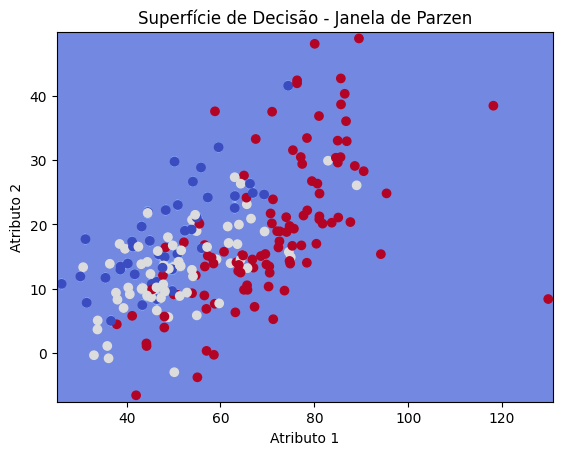

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Importar dataset Coluna Vertebral
vertebral_column = fetch_ucirepo(id=212)
X = vertebral_column.data.features
y = vertebral_column.data.targets

# Converter para NumPy array caso X seja DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Codificar labels para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Escolher os atributos 'hernia' e 'normal'
# Usaremos os índices dos atributos correspondentes, supondo que 'hernia' e 'normal' são colunas no dataset
attribute_indices = [0, 1]  # Substitua pelos índices corretos dos atributos 'hernia' e 'normal'
X = X[:, attribute_indices]

# Parâmetros para Janela de Parzen
bandwidth = 0.5  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

# Agregar matrizes de confusão de todas as execuções
conf_matrix_sum = np.sum(confusion_matrices, axis=0)

# Plotar a matriz de confusão agregada
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sum, display_labels=le.classes_)
disp.plot()
plt.title('Matriz de Confusão Agregada - 20 Execuções')
plt.show()

# Exibir conjuntos de dados de treinamento e teste de uma execução
print("Conjunto de Treinamento:\n", X_train)
print("Conjunto de Teste:\n", X_test)

# Função para plotar a superfície de decisão para o par de atributos
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    for label, kde in enumerate(kde_models):
        Z += np.exp(kde.score_samples(grid_points)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Atributo 1")
    plt.ylabel("Atributo 2")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.show()

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)


C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia média: 0.59 ± 0.04


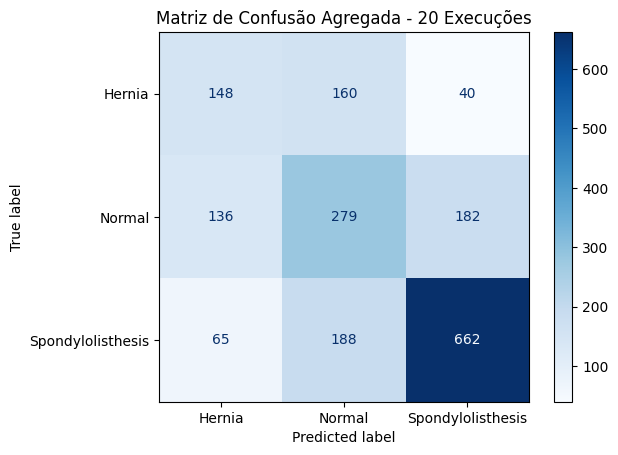

Conjunto de Treinamento:
 [[ 81.08232025  21.25584028]
 [ 59.16761171  14.56274875]
 [ 41.17167989  17.32120599]
 [ 81.05661087  20.80149217]
 [ 43.1919153    9.9766638 ]
 [ 35.49244617  11.7016723 ]
 [ 67.02766447  13.28150221]
 [ 50.08615264  13.43004422]
 [ 60.7538935   15.7538935 ]
 [ 90.51396072  28.27250132]
 [ 39.65690201  16.20883944]
 [ 74.09473084  18.82372712]
 [ 85.64378664  42.68919513]
 [ 37.90391014   4.47909896]
 [ 85.09550254  21.06989651]
 [ 48.25991962  16.41746236]
 [ 77.23689752  16.73762214]
 [ 38.66325708  12.98644139]
 [ 78.49173027  22.1817978 ]
 [ 49.70660953  13.04097405]
 [ 44.43070103  14.17426387]
 [ 50.16007802  -2.97002434]
 [ 37.7319919    9.38629828]
 [ 74.56501543  15.72431994]
 [ 85.58171024  30.45703858]
 [ 58.82837872  37.57787321]
 [ 31.23238734  17.71581923]
 [ 50.91244034  23.01516931]
 [ 43.43645061  10.09574326]
 [ 46.44207842   8.39503589]
 [ 26.14792141  10.75945357]
 [ 78.40125389  14.04225971]
 [ 54.74177518  12.09507205]
 [ 46.39026008  1

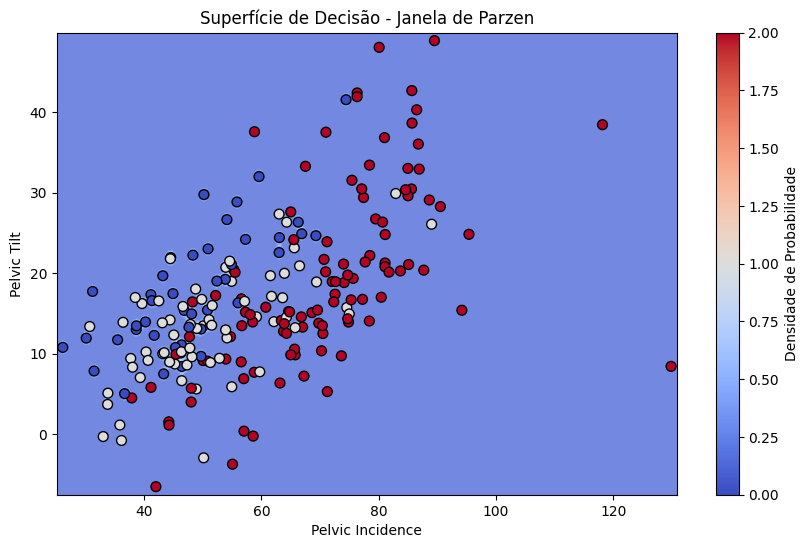

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Importar dataset Coluna Vertebral
vertebral_column = fetch_ucirepo(id=212)
X = vertebral_column.data.features
y = vertebral_column.data.targets

# Converter para NumPy array caso X seja DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Codificar labels para valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Escolher os atributos 'pelvic_incidence' e 'pelvic_tilt'
# Indices baseados no formato do dataset fornecido
attribute_indices = [0, 1]  # 'pelvic_incidence' e 'pelvic_tilt'
X = X[:, attribute_indices]

# Parâmetros para Janela de Parzen
bandwidth = 0.5  # largura de banda da janela
n_iterations = 20  # número de execuções

accuracies = []
confusion_matrices = []

# Realizar 20 execuções
for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    # Estimando a densidade de probabilidade para cada classe
    kde_models = []
    for label in np.unique(y_train):
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_train[y_train == label])
        kde_models.append(kde)
    
    # Predição dos rótulos
    log_probs = np.array([kde.score_samples(X_test) for kde in kde_models]).T
    y_pred = np.argmax(log_probs, axis=1)
    
    # Calcular acurácia e matriz de confusão
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies.append(acc)
    confusion_matrices.append(cm)

# Resultados
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Acurácia média: {mean_accuracy:.2f} ± {std_accuracy:.2f}")

# Agregar matrizes de confusão de todas as execuções
conf_matrix_sum = np.sum(confusion_matrices, axis=0)

# Plotar a matriz de confusão agregada
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sum, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão Agregada - 20 Execuções')
plt.show()

# Exibir conjuntos de dados de treinamento e teste de uma execução
print("Conjunto de Treinamento:\n", X_train)
print("Conjunto de Teste:\n", X_test)

# Função para plotar a superfície de decisão para o par de atributos
def plot_decision_boundary(X, y, kde_models, bandwidth, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.zeros(xx.shape)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    for label, kde in enumerate(kde_models):
        Z += np.exp(kde.score_samples(grid_points)).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
    plt.xlabel("Pelvic Incidence")
    plt.ylabel("Pelvic Tilt")
    plt.title("Superfície de Decisão - Janela de Parzen")
    plt.colorbar(label='Densidade de Probabilidade')
    plt.show()

# Plotar superfície de decisão usando os dados da última execução
plot_decision_boundary(X_train, y_train, kde_models, bandwidth)
